<a href="https://colab.research.google.com/github/vivekastro/Deep_Learning_tutorial/blob/master/Simple_LinearRegression_%26_Tuning_Hyperparameters_Example_ASI_ML_workshop_vivek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('Tenorflow version',tf.__version__)
print('Keras version',keras.__version__)

Tenorflow version 2.9.2
Keras version 2.9.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
# Generate dummy data
x_train = np.random.random((10000, 1))
y_train = x_train * 2 + np.random.random((10000, 1)) / 3.0
x_test = np.random.random((1000, 1))
y_test = x_test * 2 + np.random.random((1000, 1)) / 3.0

# Define the model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# Compile the model
optimizer =keras.optimizers.Adam(learning_rate = 5)
model.compile(optimizer=optimizer,  loss='mean_squared_error')

# Fit the model to the training data
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print("Test MSE: ", score)


Epoch 1/50
313/313 [==============================] - 1s 1ms/step - loss: 0.3569
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 4/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 5/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0717
Epoch 8/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0491
Epoch 9/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0664
Epoch 10/50
313/313 [==============================] - 0s 1ms/step - loss: 0.1120
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0498
Epoch 12/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0806
Epoch 13/50
313/313 [====

32/32 [==============================] - 0s 1ms/step


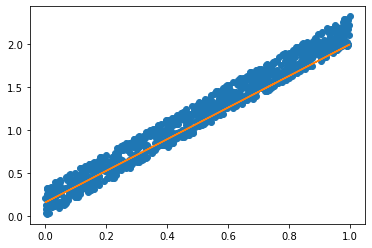

In [ ]:
plt.plot(x_test,y_test,'o')
plt.plot(x_test,model.predict(x_test),'-')

In [ ]:
def build_model(n_hidden=1, learning_rate=3e-3):
  model= Sequential()
  model.add(Dense(1, input_dim=1, activation='linear'))
  for layer in range(n_hidden):
    model.add(Dense(1,activation='linear'))
  optimizer = keras.optimizers.Adam(lr=learning_rate)
  model.compile(loss='mse',optimizer= optimizer)
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-8-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "learning_rate" : reciprocal(3e-4,5),
}

rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=2)
rnd_search_cv.fit(x_train,y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.0284
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.4802
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.3690
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.8841
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3501
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2859
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.2787
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 2.4153
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1.5958
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1.0344
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6708
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3250
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2577
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2212
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1987
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1654
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1497
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 0.1610
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 1.6868
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1.0276
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6143
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2466
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1840
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1536
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1364
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1234
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1113
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0995
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0877
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 1.7192
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 1.0542
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.6330
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2538
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1886
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1568
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1391
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1260
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1138
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0901
Epoch 13/50
250/250 [===============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 1ms/step - loss: 1.3377
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.7673
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2530
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1678
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1299
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.1001
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0704
Epoch 12/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 13/50
250/250 [===============

RandomizedSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f09004368b0>,
                   n_iter=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08f40492e0>,
                                        'n_hidden': [0, 1, 2, 3]})

In [ ]:
rnd_search_cv.best_params_


{'learning_rate': 0.0009090086177104098, 'n_hidden': 0}

In [ ]:
rnd_search_cv.best_score_

-0.009190244600176811

In [ ]:
model_new = rnd_search_cv.best_estimator_.model

32/32 [==============================] - 0s 1ms/step


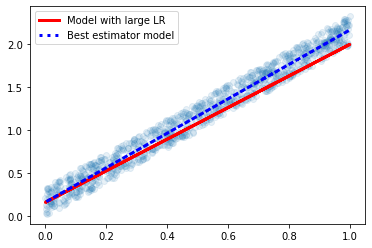

In [ ]:
plt.plot(x_test,y_test,'o',alpha=0.1)
plt.plot(x_test,model.predict(x_test),'-',lw=3,color='red',label='Model with large LR')
plt.plot(x_test,model_new.predict(x_test),':',lw=3,color='blue',label='Best estimator model')
plt.legend()